# グラフの描画

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

In [2]:
from numpy.random import randint

2個のサイコロを100回振った結果を保存

In [3]:
dices = randint(1,7,(100, 2)) 
dices[:5]

array([[1, 6],
       [5, 4],
       [5, 4],
       [1, 3],
       [4, 5]])

2個の目の合計を計算

In [4]:
total = np.sum(dices, axis=1)
total[:5]

array([7, 9, 9, 4, 9])

それぞれの目について、ゾロ目の回数を計算

In [5]:
doublets = [0,0,0,0,0,0]
for (x, y) in dices:
    if x == y:
        doublets[x-1] += 1
doublets

[2, 3, 2, 1, 5, 1]

目の組み合わせごとの回数を計算

In [6]:
counts = np.zeros((6,6))
for (x, y) in dices:
    counts[y-1, x-1] += 1
print counts

[[ 2.  1.  2.  2.  1.  1.]
 [ 2.  3.  1.  3.  3.  1.]
 [ 3.  2.  2.  5.  3.  1.]
 [ 6.  7.  1.  1.  6.  4.]
 [ 0.  4.  5.  2.  5.  3.]
 [ 5.  4.  2.  3.  3.  1.]]


計算結果をグラフに表示

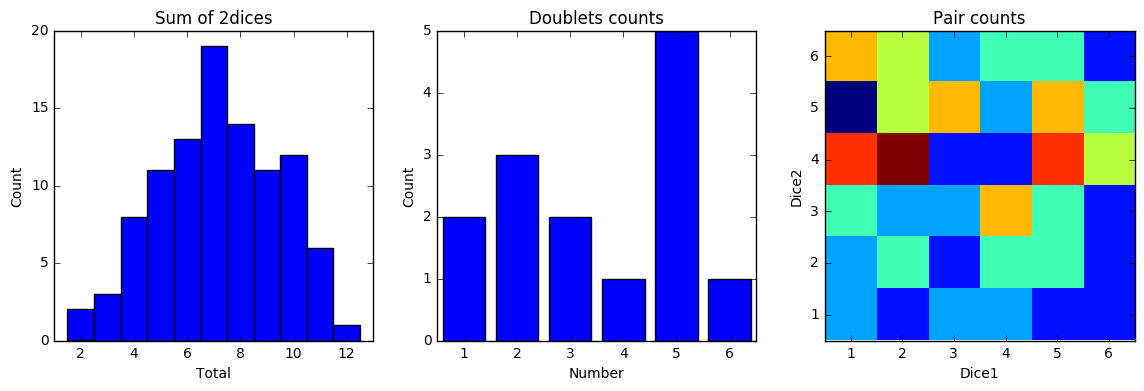

In [7]:
fig = plt.figure(figsize=(14,4))
subplot = fig.add_subplot(1,3,1)
subplot.set_title('Sum of 2dices')
subplot.set_xlabel('Total')
subplot.set_ylabel('Count')
subplot.set_xlim(1,13)
subplot.hist(total, bins=11, range=(1.5, 12.5), label='Sum')

subplot = fig.add_subplot(1,3,2)
subplot.set_title('Doublets counts')
subplot.set_xlabel('Number')
subplot.set_ylabel('Count')
subplot.set_xlim(0.5, 6.5)
subplot.bar(range(1,7), doublets, align='center')

subplot = fig.add_subplot(1,3,3)
subplot.set_title('Pair counts')
subplot.set_xlabel('Dice1')
subplot.set_ylabel('Dice2')
subplot.imshow(counts,
    origin='lower', extent=(0.5,6.5,0.5,6.5),
    interpolation='nearest')

In [8]:
from numpy.random import normal

In [9]:
def generate_data01(n):
    data_x = []
    data_y = []
    for i in range(n):
        x = float(i) / float(n-1) # [0, 1]をn等分したi番目の値
        y = np.sin(2*np.pi*x) + normal(0, 0.3)
        data_x.append(x)
        data_y.append(y)
    return data_x, data_y

In [10]:
def generate_data02(n):
    data_x = np.linspace(0,1,n)
    data_y = np.sin(2*np.pi*data_x) + normal(0, 0.3, n)
    return data_x, data_y

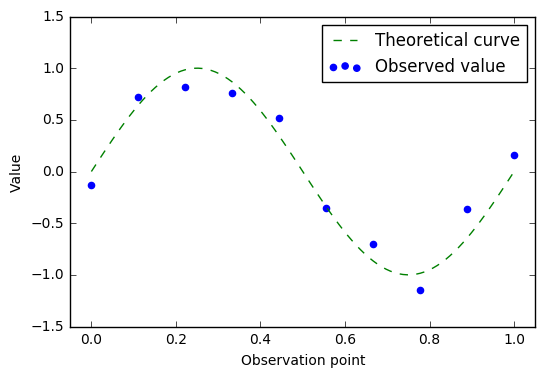

In [11]:
fig = plt.figure()

data_x, data_y = generate_data01(10)
#data_x, data_y = generate_data02(10)

subplot = fig.add_subplot(1,1,1)
subplot.set_xlabel('Observation point')
subplot.set_ylabel('Value')
subplot.set_xlim(-0.05,1.05)

# 生成したデータを表示
subplot.scatter(data_x, data_y,
                marker='o', color='blue',
                label='Observed value')

# 三角関数の曲線を表示
linex = np.linspace(0,1,100)
liney = np.sin(2*np.pi*linex)
subplot.plot(linex, liney,
             linestyle='--', color='green', 
             label='Theoretical curve')

# 凡例を表示
subplot.legend(loc=1)

## 練習問題

(1) -1≦x≦1 の範囲で、sin(2πx) と cos(2πx) のグラフを重ねて表示してください。軸ラベルや凡例などを好みで追加してください。 

(2) -1≦x≦1 の範囲で、sin(2πx) と cos(2πx) のグラフを（上下2段に）別々に表示してください。軸ラベルや凡例などを好みで追加してください。 

(3) 次は、-10≦x≦10, -10≦y≦10（x, yは整数）の範囲について、x\*x + y\*y の値を保存した10x10行列（array）を用意して、ヒートマップを描くコードです。中間部分に必要なコードを追加して、実際にヒートマップを描いてください。

(4) (3)において、imshowメソッドのオプション interpolation='nearest' を取ると結果がどのように変わるか確認しなさい。あるいは、オプション cmap=plt.cm.gray_r を付けるとどのように変わるか確認しなさい。